# Programming Exercise Week 10

You can download the data [here](https://drive.google.com/file/d/1dpuJKyX6vvSRGDTiRRHsk5OChK23joRA/view?usp=share_link). Please do not hesitate to contact Xiaochen Zheng by [this email](mailto:xzheng@ethz.ch) if you have any question.

The path to your data folder, where the data is saved:

In [2]:
pwd = '/content/drive/MyDrive/data'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We will use a special package to load and investigate the dataset, the [pandas](https://pandas.pydata.org/docs/) library. Take a look at the documentation to see all the options!

In [3]:
import os
import pandas as pd    # Package to load and investigate data

## Dataset description

In this exercise, we want to design a machine learning/deep learning algorithm to help determine/predict whether a patient is non-diabetic (int `0`) or diabetic (int `1`). Each patient is identified with a unique patient ID (pid). In `full_data_train.csv`, medical, demographic, and diagnosis data for each patient is arranged in 20 consecutive rows. Research has identified the following as **important risk factors** for diabetes:

```high blood pressure, high cholesterol, smoking, obesity, age and sex, race, diet, exercise, alcohol consumption, BMI, household income, marital status, sleep, time since last checkup, education, health care coverage, mental Health```

Given these risk factors, we selected features from a open survey of diabetes related to these risk factors.


### Features

`Diabetes_binary`

(Ever diagonsed) diabetes 

`HighBP` -> `Bool`

High Blood Pressure

`HighChol` -> `Bool`

High Cholesterol

`CholCheck` -> `Bool`

Cholesterol check within past five years

`BMI` -> `Float`

Body Mass Index (BMI)

`Smoker` -> `Bool`

Have you smoked at least 100 cigarettes (5 packs) in your entire life? 

`Stroke` -> `Bool`

(Ever diagosed) stroke. 

`HeartDiseaseorAttack` -> `Bool`

Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

`PhysActivity` -> `Bool`

Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

`Fruits` -> `Bool`

Consume Fruit 1 or more times per day 

`Veggies` -> `Bool`

Consume Vegetables 1 or more times per day 

`HvyAlcoholConsump` -> `Bool`

Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

`AnyHealthcare` -> `Bool`

Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? 

`NoDocbcCost` -> `Bool`

Was there a time in the past 12 months when you needed to see a doctor but could not because of cost?

`GenHlth` -> `Int`

Would you say that in general your health is between 5 (highest) and 1 (lowest).

`MentHlth` -> `Int`

Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? 

`PhysHlth` -> `Int`

Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? 

`DiffWalk` -> `Int`

Do you have serious difficulty walking or climbing stairs? 


`Sex`, and `Age` -> `Int`

`Education` -> `Int`

This is already an ordinal variable with 1 being never attended school or kindergarten only up to 6 being college 4 years or more


`Income` -> `Int`

Variable is already ordinal with 1 being less than \$10,000 all the way up to 8 being \$75,000 or more

### Load the data 

In [15]:
# Training dataset
full_train = pd.read_csv(os.path.join(pwd, 'full_data_train.csv'))
# Test dataset
X_test = pd.read_csv(os.path.join(pwd, 'indicators_test.csv'))
y_test = pd.read_csv(os.path.join(pwd, 'y_test.csv'))

### Check the raw data

Use ```pandas.DataFrame.info``` to describe null values, data type, memory usage

In [16]:
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228312 entries, 0 to 228311
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   PID                   228312 non-null  int64  
 1   Diabetes_binary       228312 non-null  float64
 2   HighBP                228312 non-null  float64
 3   HighChol              228312 non-null  float64
 4   CholCheck             228312 non-null  float64
 5   BMI                   228312 non-null  float64
 6   Smoker                228312 non-null  float64
 7   Stroke                228312 non-null  float64
 8   HeartDiseaseorAttack  228312 non-null  float64
 9   PhysActivity          228312 non-null  float64
 10  Fruits                228312 non-null  float64
 11  Veggies               228312 non-null  float64
 12  HvyAlcoholConsump     228312 non-null  float64
 13  AnyHealthcare         228312 non-null  float64
 14  NoDocbcCost           228312 non-null  float64
 15  

In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25368 entries, 0 to 25367
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PID                   25368 non-null  int64  
 1   HighBP                25368 non-null  float64
 2   HighChol              25368 non-null  float64
 3   CholCheck             25368 non-null  float64
 4   BMI                   25368 non-null  float64
 5   Smoker                25368 non-null  float64
 6   Stroke                25368 non-null  float64
 7   HeartDiseaseorAttack  25368 non-null  float64
 8   PhysActivity          25368 non-null  float64
 9   Fruits                25368 non-null  float64
 10  Veggies               25368 non-null  float64
 11  HvyAlcoholConsump     25368 non-null  float64
 12  AnyHealthcare         25368 non-null  float64
 13  NoDocbcCost           25368 non-null  float64
 14  GenHlth               25368 non-null  float64
 15  MentHlth           

In [18]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25368 entries, 0 to 25367
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              25368 non-null  int64  
 1   Diabetes_binary  25368 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 396.5 KB


## Data Preprocessing
Take a look at the raw data and think carefully about what kinds of data preprocessing methods needed.

In [19]:
# You do not necessarily need to do anything here, this is just to provide some space to look at the dataset's properties and contents.
"*** YOUR CODE HERE. ***"

'*** YOUR CODE HERE. ***'

### Task 1
Notice that there is one column name **PID** in both *full_train* and *X_test*. Why should we better remove this from the data?

Your Answer: Because "PID" stands for "patient ID", which is irrelevant to determining/predicting whether a patient is diabetic or not.

### Task 2
 Use the pandas `drop` function to remove the PID column in test and training set

In [20]:
full_train = full_train.drop(['PID'], axis=1)
X_test = X_test.drop(['PID'], axis=1)

### Task 3
Separate the labels in the column `Diabetes_binary` from the training set and create a new tensor `y_train` and `y_test` containing the labels

In [21]:
X_train = full_train.drop(['Diabetes_binary'], axis=1).to_numpy()
y_train = full_train['Diabetes_binary'].to_numpy()
X_test = X_test.to_numpy()
y_test = y_test['Diabetes_binary'].to_numpy()

### Task 4 - Standardization Scaling
Notice that different features have different scales. For example, `BMI` ranges from 12.0 to 98.0 and `Age` ranges from 1.0 to 13.0. Normalization is a data preparation technique that is frequently used in machine learning to deal with data with different scales.

Here you will apply **standardization scaling**. The term **standardization** refers to the process of centering a variable at zero and standardizing the variance at one. Subtracting the mean of each observation and then dividing by the standard deviation is the procedure. The features will be rescaled so that they have the attributes of a typical normal distribution with standard deviations.

***Hint***: Use `numpy` or `Standardscaler` provided by `sklearn`

In [22]:
import numpy as np
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X_train = stdScaler.fit_transform(X_train)

### Task 5 - Data Structure
By applying `pd.read_csv()`, you store your data in `pandas.DataFrame`. After finishing task 4, you should store your data in `numpy.ndarray`. But for `torch.nn.Module`, you need to transfer your data to the data type `torch.Tensor`.

***Hint***: Try to learn and apply [torch.from_numpy()](https://pytorch.org/docs/stable/generated/torch.from_numpy.html), [torch.Tensor.to()](https://pytorch.org/docs/stable/generated/torch.Tensor.to.html), [torch.tensor()](https://pytorch.org/docs/stable/generated/torch.tensor.html).

Transform the variables `X_train`, `X_test`, `y_train` and `y_test`

In [23]:
import torch

X_train = torch.from_numpy(X_train).to(dtype=torch.float)
y_train = torch.from_numpy(y_train).to(dtype=torch.long)

X_test = torch.from_numpy(X_test).to(dtype=torch.float)
y_test = torch.from_numpy(y_test).to(dtype=torch.long)

## Deep learning model

### Task 6
Finish the deep learning skeleton step-by-step.

***Hint***: 

(1) Implement a multilayer perceptron with several [linear layers](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) (e.g. 4 linear layers) followed by [relu activation](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html#torch.nn.ReLU). We show you an example of the first layer.

(2) Take regularization into account and implement certain layers to avoid overfitting. e.g. dropout

(3) Make sure that the output's size of one layer should match the input's size of the following/subsequent layer by checking `tensor.shape`.

(4) Make sure that your model's output should have the size of ($N$, 2), where $N$ is the batch size. 2 represents the possible outcome state of the model e.g. diabetic or non-diabetic



In [24]:
from torch import nn
class YourModel(torch.nn.Module):
    """ Your model should inherite from torch.nn.Module.
    """
    def __init__(self):
        super().__init__()
        # Fully-connected (dense) layers
        self.fc1 = nn.Linear(21 , 64 )
        self.fc2 = nn.Linear(64 , 512)
        self.fc3 = nn.Linear(512, 512)
        self.fc4 = nn.Linear(512, 2  )
        # Drop-out layers
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        '''Forward pass.'''
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = nn.functional.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = nn.functional.relu(x)
        return x

In [25]:
def train(model, train_loader, criterion, optimizer, epoch):
    model.train()
    # Iterate over the DataLoader for training data
    for batch_idx, (data, target) in enumerate(train_loader):
        # Zero the gradients
        optimizer.zero_grad()
        # Perform forward pass
        outputs = model(data)
        # Compute loss
        loss = criterion(outputs, target)
        # Perform backward pass
        loss.backward()
        # Perform optimization
        optimizer.step()
        # Printing
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test(model, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), test_accuracy))
    
    return test_loss, test_accuracy

In [26]:
from torch.utils.data import TensorDataset, DataLoader
def main(train_data, train_label, test_data, test_label, batch_size, epochs):
    """ Training your model.

    Args:
        train_data, test_data (tensor): The training/testing data. It should have a shape of (n_instance, n_features).
        train_label, test_label (tensor): The labels of training/testing instances. It should have a shape of (n_instance, 1).
        batch_size  (Union[int, NoneType]): The number of samples loaded for one iteration.
        epochs (Union[int, NoneType]): The number of epochs. When this reaches, the training stops.
    """
    # Set fixed random number seed. DO NOT CHANGE IT.
    torch.manual_seed(336699)
    
    # Prepare series dataset.
    train_dataset = TensorDataset(train_data, train_label)
    train_loader  = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_dataset  = TensorDataset(test_data, test_label)
    test_loader   = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    # Initialize proposed model.
    model = YourModel() 

    # Define the loss function and optimizer. You can freely choose your loss function and optimizer based on your task.
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    criterion = torch.nn.CrossEntropyLoss()
    criterion_test = torch.nn.CrossEntropyLoss(reduction='sum')

    # Run the training loop
    losses = []
    accuracies = []
    for epoch in range(1, epochs+1):
        # Print epoch
        print(f'Starting epoch {epoch}')
        train(model, train_loader, criterion, optimizer, epoch)
        test_loss, test_accuracy = test(model, test_loader, criterion_test)
        losses.append(test_loss)
        accuracies.append(test_accuracy)
        
    # Process is complete.
    print('Training process has finished.')
    
    return losses, accuracies


if __name__ == '__main__':
    # Run your codes here.
    losses, accuracies = main(X_train, y_train, X_test, y_test, 256, 20) #exchange with your variabel names

Starting epoch 1
Train Epoch: 1 [0/228312 (0%)]	Loss: 0.698828
Train Epoch: 1 [25600/228312 (11%)]	Loss: 0.356995
Train Epoch: 1 [51200/228312 (22%)]	Loss: 0.289147
Train Epoch: 1 [76800/228312 (34%)]	Loss: 0.333199
Train Epoch: 1 [102400/228312 (45%)]	Loss: 0.346933
Train Epoch: 1 [128000/228312 (56%)]	Loss: 0.300793
Train Epoch: 1 [153600/228312 (67%)]	Loss: 0.328935
Train Epoch: 1 [179200/228312 (78%)]	Loss: 0.336842
Train Epoch: 1 [204800/228312 (90%)]	Loss: 0.234472

Test set: Average loss: 0.6751, Accuracy: 21752/25368 (86%)

Starting epoch 2
Train Epoch: 2 [0/228312 (0%)]	Loss: 0.299164
Train Epoch: 2 [25600/228312 (11%)]	Loss: 0.262333
Train Epoch: 2 [51200/228312 (22%)]	Loss: 0.338873
Train Epoch: 2 [76800/228312 (34%)]	Loss: 0.280064
Train Epoch: 2 [102400/228312 (45%)]	Loss: 0.335847
Train Epoch: 2 [128000/228312 (56%)]	Loss: 0.281099
Train Epoch: 2 [153600/228312 (67%)]	Loss: 0.314652
Train Epoch: 2 [179200/228312 (78%)]	Loss: 0.378633
Train Epoch: 2 [204800/228312 (90%)]	L

Please interpret the resuls of your analysis. What can be learned? What can we utilise the algorithm? Is it visible to use the algorithm in practice, considering the training and test error?

We find that, as the training process goes, the accuracy of the model converges to a satisfying level (~85%). This suggests that we can use such algorithm to predict/determine whether a patient is diabetic or not. It is visible to use the algorithm in practice, considering the training and test error. However, we should point out that such algorithm should be treated as medical suggestions instead of definitive medical decisions, as the cost would be high if a mis-diagnosis took place.

In [27]:
from matplotlib import pyplot as plt

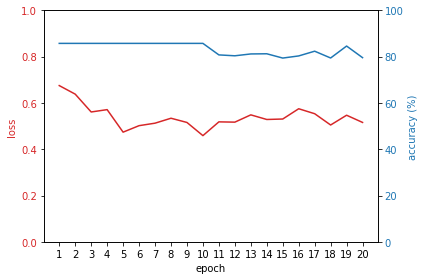

In [30]:
t = range(1, 21)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss', color=color)
ax1.plot(t, losses, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([0, 1])

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('accuracy (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, accuracies, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0, 100])

plt.xticks(list(t))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()